<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Cristina Vazquez, Gerardo Ruiz Velasco Lazalde.

**Fecha:** 20 de febrero del 2021.

**Expediente** : ,715878 .
**Profesor:** Oscar David Jaramillo Zuluaga.

**Link repositorio: https://github.com/GerardoRVL97/TAREA_9_RUIZ_G_VAZQUEZ_C **

# Tarea 9: Clase 

# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y compararlo con el valor teórico de la ecuación de Black-Scholes

In [2]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [3]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry')
# aapl

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-06-18,18.75,call,AAPL210618C00018750,...,2021-04-27 23:59:58,2021-04-26 18:30:03,"{'contractSymbol': 'AAPL210618C00018750', 'str..."
2021-06-18,18.75,put,AAPL210618P00018750,...,2021-04-27 23:59:58,2021-04-22 14:35:20,"{'contractSymbol': 'AAPL210618P00018750', 'str..."
2021-06-18,20.00,call,AAPL210618C00020000,...,2021-04-27 23:59:58,2021-04-14 15:36:52,"{'contractSymbol': 'AAPL210618C00020000', 'str..."
2021-06-18,20.00,put,AAPL210618P00020000,...,2021-04-27 23:59:58,2021-03-22 19:57:37,"{'contractSymbol': 'AAPL210618P00020000', 'str..."
2021-06-18,21.25,call,AAPL210618C00021250,...,2021-04-27 23:59:58,2021-02-04 18:50:12,"{'contractSymbol': 'AAPL210618C00021250', 'str..."
...,...,...,...,...,...,...,...
2021-09-17,1000.00,call,AAPL210917C01000000,...,2021-04-27 23:59:58,2020-08-28 19:58:31,"{'contractSymbol': 'AAPL210917C01000000', 'str..."
2022-01-21,1000.00,call,AAPL220121C01000000,...,2021-04-27 23:59:58,2020-08-28 19:59:43,"{'contractSymbol': 'AAPL220121C01000000', 'str..."
2022-06-17,1000.00,call,AAPL220617C01000000,...,2021-04-27 23:59:58,2020-08-28 19:48:09,"{'contractSymbol': 'AAPL220617C01000000', 'str..."


In [4]:
aapl_opt.Underlying_Price[0]

134.79

In [5]:
aapl_opt.loc[0, 'JSON']

{'contractSymbol': 'AAPL210618C00018750',
 'strike': 18.75,
 'currency': 'USD',
 'lastPrice': 115.8,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 1,
 'openInterest': 27,
 'bid': 114.45,
 'ask': 116.6,
 'contractSize': 'REGULAR',
 'expiration': 1623974400,
 'lastTradeDate': 1619461803,
 'impliedVolatility': 3.0839866650390624,
 'inTheMoney': True}

In [6]:
fecha1 = '2021-06-18'
fecha2 = '2022-09-16'
put06_f1 = aapl_opt.loc[(aapl_opt.Expiry== fecha1) & (aapl_opt.Type=='put')]
put06_f2 = aapl_opt.loc[(aapl_opt.Expiry== fecha2) & (aapl_opt.Type=='put')]
put06_f1

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1,18.75,2021-06-18,put,...,2021-04-27 23:59:58,2021-04-22 14:35:20,"{'contractSymbol': 'AAPL210618P00018750', 'str..."
3,20.00,2021-06-18,put,...,2021-04-27 23:59:58,2021-03-22 19:57:37,"{'contractSymbol': 'AAPL210618P00020000', 'str..."
5,21.25,2021-06-18,put,...,2021-04-27 23:59:58,2021-04-22 18:11:42,"{'contractSymbol': 'AAPL210618P00021250', 'str..."
7,22.50,2021-06-18,put,...,2021-04-27 23:59:58,2021-03-02 20:14:35,"{'contractSymbol': 'AAPL210618P00022500', 'str..."
10,23.75,2021-06-18,put,...,2021-04-27 23:59:58,2021-03-02 18:56:38,"{'contractSymbol': 'AAPL210618P00023750', 'str..."
...,...,...,...,...,...,...,...
2245,640.00,2021-06-18,put,...,2021-04-27 23:59:58,2020-08-25 16:08:58,"{'contractSymbol': 'AAPL210618P00640000', 'str..."
2255,660.00,2021-06-18,put,...,2021-04-27 23:59:58,2020-08-27 16:29:02,"{'contractSymbol': 'AAPL210618P00660000', 'str..."
2263,680.00,2021-06-18,put,...,2021-04-27 23:59:58,2020-08-25 14:59:07,"{'contractSymbol': 'AAPL210618P00680000', 'str..."
2271,700.00,2021-06-18,put,...,2021-04-27 23:59:58,2020-08-27 19:58:45,"{'contractSymbol': 'AAPL210618P00700000', 'str..."


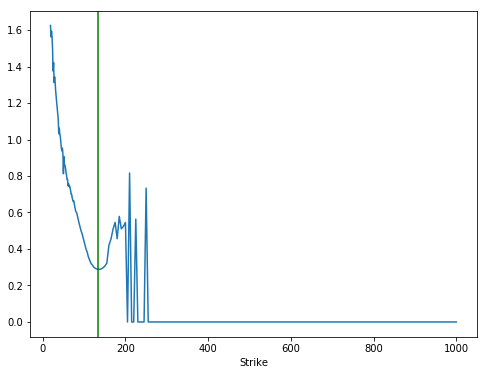

In [7]:
# para los put de la fecha 1
ax = put06_f1.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06_f1.Underlying_Price.iloc[0], color='g');

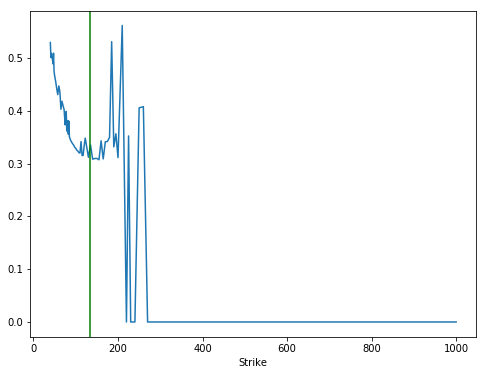

In [8]:
# para los put de la fecha 2
ax = put06_f2.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06_f2.Underlying_Price.iloc[0], color='g');

In [9]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

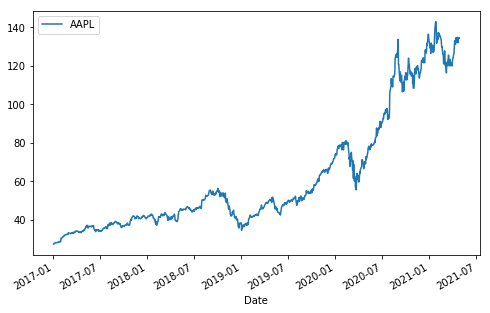

In [10]:
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [11]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

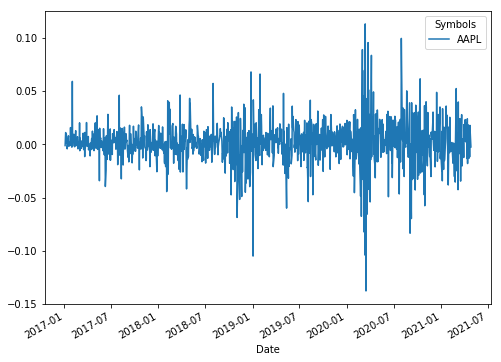

In [12]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

In [13]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-04-30,75.0,put,AAPL210430P00075000,...,2021-04-27 23:59:58,2021-04-27 13:30:01,"{'contractSymbol': 'AAPL210430P00075000', 'str..."
2021-04-30,132.0,put,AAPL210430P00132000,...,2021-04-27 23:59:58,2021-04-27 19:59:57,"{'contractSymbol': 'AAPL210430P00132000', 'str..."
2021-04-30,80.0,put,AAPL210430P00080000,...,2021-04-27 23:59:58,2021-04-26 16:38:05,"{'contractSymbol': 'AAPL210430P00080000', 'str..."
2021-04-30,80.0,call,AAPL210430C00080000,...,2021-04-27 23:59:58,2021-04-26 18:35:15,"{'contractSymbol': 'AAPL210430C00080000', 'str..."
2021-04-30,133.0,call,AAPL210430C00133000,...,2021-04-27 23:59:58,2021-04-27 19:59:57,"{'contractSymbol': 'AAPL210430C00133000', 'str..."
...,...,...,...,...,...,...,...
2023-06-16,120.0,call,AAPL230616C00120000,...,2021-04-27 23:59:58,2021-04-27 19:43:40,"{'contractSymbol': 'AAPL230616C00120000', 'str..."
2023-06-16,120.0,put,AAPL230616P00120000,...,2021-04-27 23:59:58,2021-04-27 18:59:46,"{'contractSymbol': 'AAPL230616P00120000', 'str..."
2023-06-16,125.0,call,AAPL230616C00125000,...,2021-04-27 23:59:58,2021-04-27 19:34:54,"{'contractSymbol': 'AAPL230616C00125000', 'str..."


In [14]:
aapl_opt.Underlying_Price[0]


134.79

In [15]:
K = 135 # strike price
indice_opt = aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==K) & (aapl_opt.Expiry=='2023-06-16')]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1231,135.0,2023-06-16,put,...,2021-04-27 23:59:58,2021-04-27 17:55:59,"{'contractSymbol': 'AAPL230616P00135000', 'str..."


In [16]:
i_opt= indice_opt.index
opcion_valuar = aapl_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'AAPL230616P00135000',
 'strike': 135.0,
 'currency': 'USD',
 'lastPrice': 24.25,
 'change': 0.25,
 'percentChange': 1.0416667,
 'volume': 103,
 'openInterest': 167,
 'bid': 22.0,
 'ask': 27.0,
 'contractSize': 'REGULAR',
 'expiration': 1686873600,
 'lastTradeDate': 1619546159,
 'impliedVolatility': 0.34361923477172845,
 'inTheMoney': True}

In [17]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  134.79


In [18]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AAPL
Date,
2017-01-04,-0.001
2017-01-05,0.005
2017-01-06,0.011
2017-01-09,0.009
2017-01-10,0.001
...,...
2021-04-21,0.003
2021-04-22,-0.012
2021-04-23,0.018


In [19]:
from datetime import date

# Encontrar la fecha de hoy en fomato timestamp
today = pd.to_datetime(date.today())

# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry

nscen = 1000

# Generar rangos de fechas de días hábiles
dates = pd.date_range(today, expiry, freq='B')
ndays = len(dates)

In [20]:
today = pd.to_datetime(date.today())

# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry

len(pd.date_range(today, expiry, freq='B'))

559

In [21]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,...,997,998,999
2021-04-27,1.490e-03,1.317e-02,5.149e-04,...,8.575e-04,-3.606e-02,-6.081e-03
2021-04-28,2.398e-06,1.374e-04,-2.518e-06,...,5.012e-07,-6.912e-04,-4.156e-05
2021-04-29,4.472e-08,3.390e-06,-3.585e-08,...,-7.225e-09,1.542e-05,-6.741e-07
2021-04-30,8.920e-10,2.611e-08,-1.095e-10,...,1.308e-10,4.748e-07,-4.386e-09
2021-05-03,7.044e-12,-5.052e-10,-1.078e-12,...,-3.652e-13,-2.685e-09,-5.540e-11
...,...,...,...,...,...,...,...
2023-06-12,-0.000e+00,-0.000e+00,-0.000e+00,...,0.000e+00,-0.000e+00,0.000e+00
2023-06-13,0.000e+00,0.000e+00,0.000e+00,...,0.000e+00,0.000e+00,-0.000e+00
2023-06-14,-0.000e+00,-0.000e+00,0.000e+00,...,-0.000e+00,0.000e+00,-0.000e+00
2023-06-15,0.000e+00,-0.000e+00,-0.000e+00,...,-0.000e+00,0.000e+00,0.000e+00


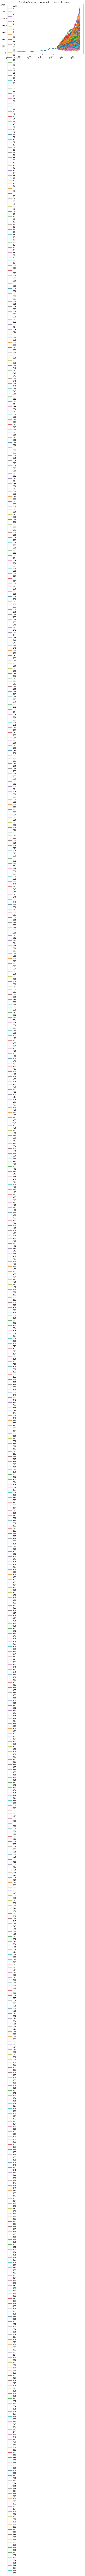

In [22]:
# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,S_T]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

In [23]:
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
# pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
# plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

0.8567058958229448

In [24]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son similares


(0.019911965527923476, 0.01993063800754141)

In [25]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL230616P00135000',
 'strike': 135.0,
 'currency': 'USD',
 'lastPrice': 24.25,
 'change': 0.25,
 'percentChange': 1.0416667,
 'volume': 103,
 'openInterest': 167,
 'bid': 22.0,
 'ask': 27.0,
 'contractSize': 'REGULAR',
 'expiration': 1686873600,
 'lastTradeDate': 1619546159,
 'impliedVolatility': 0.34361923477172845,
 'inTheMoney': True}